In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:\Gopinath Space\____I got Job!\Github Projects\Simplilearn-California-Housing-Price-Prediction\data\housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
missing_values = df.isnull().sum()

In [6]:
missing_values 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [8]:
missing_values = df.isnull().sum()
missing_values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [9]:
label_encoder = LabelEncoder()

df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [10]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']]

y = df['median_house_value']

In [11]:
# Split the data into 80% training and 20% test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

Mean Absolute Error: 51846.87784903815
Mean Squared Error: 5055025116.165612
Root Mean Squared Error: 71098.69982050032
R-squared: 0.6142406531011787


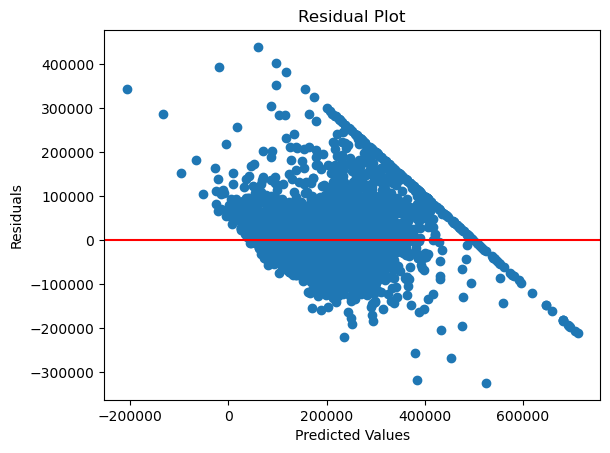

In [19]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, Y_train)

Y_pred_linear = linear_reg.predict(X_test_scaled)


# Step 5: Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred_linear)
mse = mean_squared_error(Y_test, Y_pred_linear)
rmse = np.sqrt(mse)
r_squared = r2_score(Y_test, Y_pred_linear)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

# Step 6: Plot residuals
residuals = Y_test - Y_pred_linear
plt.scatter(Y_pred_linear, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()



In [29]:
def plot_actual_vs_predicted(Y_pred_linear, Y_test, sample_size):
    # Create a DataFrame with predicted and actual values
    test = pd.DataFrame({'Predicted': Y_pred_linear, 'Actual': Y_test})
    
    # Reset index and drop the index column
    test = test.reset_index()
    test = test.drop(['index'], axis=1)
    
    # Plot the first `sample_size` values
    fig = plt.figure(figsize=(16, 8))
    plt.plot(test[:sample_size])
    plt.legend(['Actual', 'Predicted'])
    
    # Create a joint plot to visualize the relationship between actual and predicted values
    sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg')
    
    plt.show()


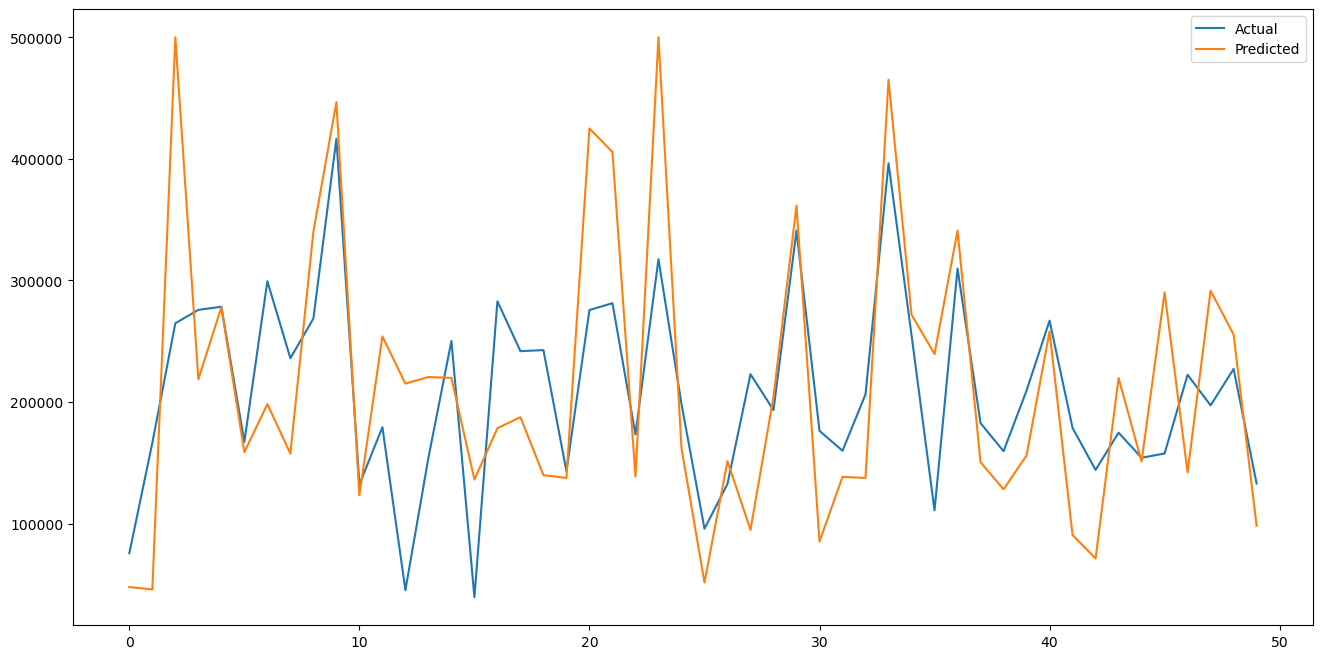

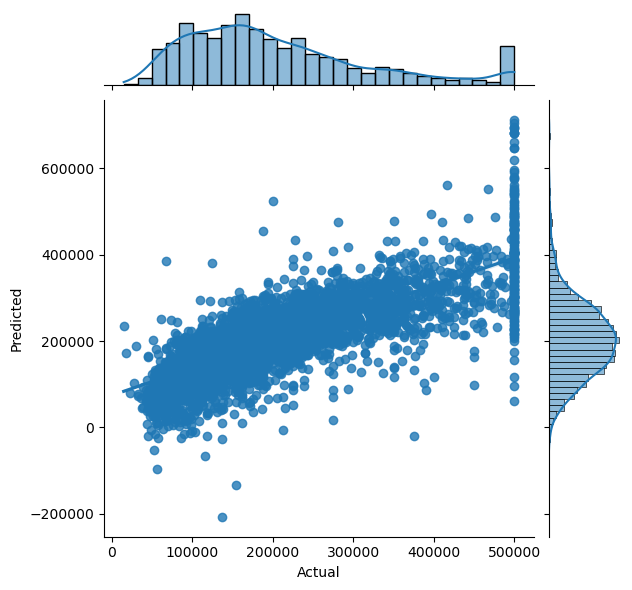

In [32]:
plot_actual_vs_predicted(Y_pred_linear, Y_test,50)

In [14]:

# Calculate RMSE for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_pred_linear))
print("Root Mean Squared Error (RMSE) from Linear Regression:", rmse_linear)

# 7. Perform Decision Tree Regression
# Initialize Decision Tree Regression model
dt_reg = DecisionTreeRegressor()

# Fit the model on training data
dt_reg.fit(X_train_scaled, Y_train)

# Predict the output for test dataset
Y_pred_dt = dt_reg.predict(X_test_scaled)

# Calculate RMSE for Decision Tree Regression
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))
print("Root Mean Squared Error (RMSE) from Decision Tree Regression:", rmse_dt)

# 8. Perform Random Forest Regression
# Initialize Random Forest Regression model
rf_reg = RandomForestRegressor()

# Fit the model on training data
rf_reg.fit(X_train_scaled, Y_train)

# Predict the output for test dataset
Y_pred_rf = rf_reg.predict(X_test_scaled)

# Calculate RMSE for Random Forest Regression
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print("Root Mean Squared Error (RMSE) from Random Forest Regression:", rmse_rf)


Root Mean Squared Error (RMSE) from Linear Regression: 71098.69982050032
Root Mean Squared Error (RMSE) from Decision Tree Regression: 67943.72079265273
Root Mean Squared Error (RMSE) from Random Forest Regression: 49931.51152187341
